In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 웹서버에 요청request를 하고 서버로부터 content를 받는다.
# request 방식 : post 방식 / get 방식 / fetch / delete

# get 방식 : 요청하는 내용을, url에 포함해서 요청하는 방식

# post 방식 : 요청하는 내용을 url이 아니라 별도로 서버에 전송하는 방식
#import requests
#url = 'www.daum.net'
#data = {'w' : 'news', 
#        'q' : '검색어',
#        'p' : '페이지번호', }
#requests.post(url, data=data)

# rest api : 웹서버에서 지정한 url로 특정 파라민터값을 전달하면, 지정된 data를 return => post, get
# site마다 별도로 요청 url과 전달할 파라미터값을 각각 지정...



In [ ]:
#!pip install -U finance-datareader
#!pip install pyupbit

In [ ]:
import FinanceDataReader as fdr

# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

In [ ]:
# 애플(AAPL), 2018-01-01 ~ 2018-03-30
df = fdr.DataReader('AAPL', '2018-01-01', '2018-03-30')
df.tail()

In [ ]:
import pyupbit

pyupbit.get_ohlcv('KRW-BTC', count=2000)

In [ ]:
# OpenAPI 가져오는 일반적인 URL
# url = 'http://openapi.seoul.go.kr:8088/인증키/json/bikeList/1/5'

In [ ]:
# 서울시 열린 데이터 광장
# https://data.seoul.go.kr/index.do

#url = 'http://openapi.seoul.go.kr:8088/(인증키)/json/bikeList/1/5'

# KEY	String(필수)	인증키	OpenAPI 에서 발급된 인증키
# TYPE	String(필수)	요청파일타입
# xml : xml
# json파일 : json
# SERVICE	String(필수)	서비스명	bikeList
# START_INDEX	INTEGER(필수)	요청시작위치	정수 입력 (페이징 시작번호 입니다 : 데이터 행 시작번호)
# END_INDEX	INTEGER(필수)	요청종료위치	정수 입력 (페이징 끝번호 입니다 : 데이터 행 끝번호)

In [ ]:
# 아파트 매매 실거래자격지수
# https://kosis.kr/openapi/index/index.jsp

import requests
import pandas as pd
import json

url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey={}&itmId=T1+&objL1=000+&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&newEstPrdCnt=36&prdInterval=1&orgId=408&tblId=DT_KAB_11672_S1'
# 인증키
url = url.format('MGE0YWZjOGMyZjA1M2IwOWVlZTYxNDNjNTcyZjFmMDc=')

res = requests.get(url)
res
df = pd.DataFrame(json.loads(res.text))
df.head(5)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)


# http://www.ad.co.kr/stat/index.hjsp

# data : 2015ad.csv, 2016ad.csv, 2017ad.csv, 2018ad.csv, 2019ad.csv

ad_doc = {}
ad_doc_root = pd.DataFrame()

ad_list = ['2015','2016','2017','2018','2019']

for item in ad_list:
    ad_doc[item] = pd.read_csv(r'eda_data_files\{}ad.csv'.format(item),index_col=0,skiprows=1)

# 2015년 기업들의 매체별 광고비 지출 데이터
ad_doc['2015'].head(5)

,회사명,TV,라디오,신문,잡지
0,,,,,
1,삼성전자,11479225,423815,6203885,242300
2,KT,8380633,368017,905887,25100
3,LG전자,6748621,342048,1969787,114800
4,한국지엠,6791838,596281,662799,35200
5,현대자동차,4453752,414230,2817550,108300


In [28]:
# 2016년도에 tv광고를 가장 많이 한 기업 상위 5개
ad_doc['2016'].sort_values('TV', ascending=False)['회사명'].head(5)

0
1      삼성전자
4      LG전자
2     현대자동차
5        KT
3    아모레퍼시픽
Name: 회사명, dtype: object

In [29]:
# 2016년도에 전체 광고비를 가장 많이 지출한 기업 상위 5개
for item in ad_list:
    ad_doc[item]['총합'] = ad_doc[item][['TV','라디오','신문','잡지']].sum(axis=1)
ad_doc['2016'].sort_values('총합',ascending=False).head(5)

,회사명,TV,라디오,신문,잡지,총합
0,,,,,,
1,삼성전자,8571937,255932,6769684,223800,15821353
2,현대자동차,4929457,448627,2711580,115300,8204964
3,아모레퍼시픽,4563944,222294,1742959,987600,7516797
4,LG전자,5587791,72904,1298358,184400,7143453
5,KT,4792340,317334,1120930,33100,6263704


In [30]:
# 연도별 전체 광고비 비출 총액
ad_doc_root['회사명'] = ad_doc['2015']['회사명']

for item in ad_list:
    ad_doc_root[(item + '총합')] = ad_doc[item]['총합']

ad_doc_root

,회사명,2015총합,2016총합,2017총합,2018총합,2019총합
0,,,,,,
1,삼성전자,18349225,15821353,19658896,19674067,15480902
2,KT,9679637,8204964,16933848,19123959,14111554
3,LG전자,9175256,7516797,6601365,5466186,7417422
4,한국지엠,8086118,7143453,5177880,5262038,6935642
5,현대자동차,7793832,6263704,4860579,4995450,6390754
...,...,...,...,...,...,...
95,일룸,1003597,879361,992703,888398,990699
96,라이나생명보험,993295,869385,989390,884590,973638
97,기상청,984500,865285,987986,857236,963821


In [31]:
# 연도별 총 광고비 최대 지출 기업
ad_doc_sum_max = pd.DataFrame(columns = ['회사명','총합'])

for item in ad_list:
    ad_doc_sum_max.loc[item] = ad_doc_root[ad_doc_root[item + '총합'].max() == ad_doc_root[item + '총합']]['회사명'].loc[1], ad_doc_root[ad_doc_root[item + '총합'].max() == ad_doc_root[item + '총합']][item + '총합'].loc[1]
ad_doc_sum_max

,회사명,총합
2015,삼성전자,18349225
2016,삼성전자,15821353
2017,삼성전자,19658896
2018,삼성전자,19674067
2019,삼성전자,15480902


<Axes: >

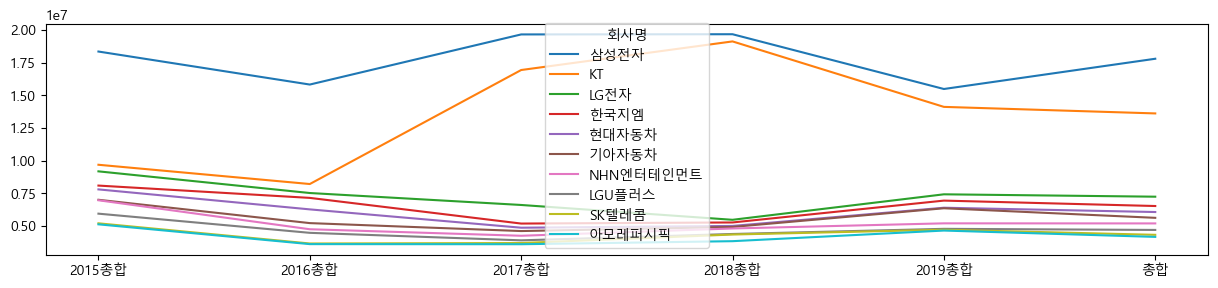

In [52]:
# 연도별 광고비 지출 추이를 총 광고비 상위 10대 기업을 기준으로 출력..
#ad_state_doc = pd.DataFrame()

#temp_data = ad_doc['2016'].sort_values('총합',ascending=False).loc[:10]
#temp_data
#.plot(figsize=(15,10))

#ad_doc_root = ad_doc_root.set_index(keys=['회사명'],inplace=False, drop=True)
test_doc = ad_doc_root.copy()
test_doc.sum(axis=1)
test_doc['총합'] = test_doc.mean(axis=1)
test_doc.sort_values('총합',ascending=False)[:10].T.plot(figsize=(15,3))


<Axes: xlabel='year'>

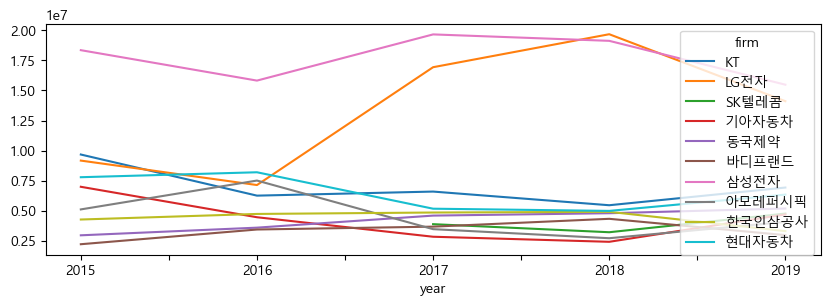

In [50]:
# 답안

ad2016= pd.read_csv(r'eda_data_files\{}ad.csv'.format(2016),index_col=0)
ad2016.drop(0, inplace=True)

ad2016.set_index('firm', inplace=True)
for col in ad2016.columns:
  ad2016[col] = pd.to_numeric(ad2016[col])
  
# 2016년도에 tv광고액을 가장 많이 지출한 기없 상위 5개..
ad2016.sort_values('tv', ascending=False).iloc[0]

# 2016년도에 전체 광고비를 가장 많이 지출한 기업 상위 5개
ad2016.sum(axis=1).sort_values(ascending=False).iloc[:5]

# 연도별 전체 광고비 비출 총액
ad_list = []

for i, file in enumerate(['2015ad.csv','2016ad.csv','2017ad.csv','2018ad.csv','2019ad.csv']):
  df = pd.read_csv('eda_data_files/{}'.format(file), index_col=0)
  df.drop(0, inplace=True)
  df.set_index('firm', inplace=True)
  for col in df.columns:
    df[col] = pd.to_numeric(df[col])
  year = str(2015 + i)
  df['year'] = year
  ad_list.append(df)


df_con = pd.concat(ad_list)
df_con.head()

# 연도별 전체 광고비 지출 총액...

df_con['총광고비'] = df_con.loc[:, 'tv':'magazine'].sum(axis=1)
df_con.groupby('year')['총광고비'].sum()

# 연도별 총광고비 최대 지출기업...
year_ad_max = df_con.groupby(['year'])['총광고비'].max().values
df_con[df_con['총광고비'].isin(year_ad_max)]

# 총광고비 상위 10대 기업의 연도별 광고비 지출 추이를 출력..
firm10 = df_con.groupby('firm')['총광고비'].sum().sort_values(ascending=False).iloc[:10].index

df_top10 = df_con[df_con.index.isin(firm10)]
df_top10

df_top10.groupby(['firm', 'year'])['총광고비'].sum().unstack().T.plot(figsize=(10,3))

In [66]:
# 시간데이터
# 시각화

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

birth = dt.date(1991, 4, 12)
#birth.year
#birth.month
#birth.day
#type(dt.time(6,45,22))

alarm = dt.time(hour=9, second=22, minute=30)

## 가능한 형태
# type(alarm)
# dt.time(hour=9, second=22)
# dt.time(hour=9, minute=43, second=22)
# alarm.hour
# alarm.minute
# alarm.second

moon_landing = dt.datetime(1944, 8, 23, 22, 12, 32)

dt.datetime(2020,1,1)
dt.timedelta(
    weeks=8,
    days=6,
    hours=3,
    minutes=45,
    seconds=12
)

dt.datetime(
    year=1979,
    month=7,
    day=12,
    hour=22,
    minute=55,
    second=10
)

# 판다스

# pd.Timestamp('2015-12-12')
# pd.Timestamp('2015/12/12')
# pd.Timestamp('12/12/2015')

my_time = pd.Timestamp('2021-03-08 6:12:12 pm')
my_time.now()
#dt.time(9,0,22)

print(my_time.year)
print(my_time.month)
print(my_time.day)
print(my_time.hour)
print(my_time.minute)
print(my_time.minute)
print(my_time.second)

###

mixed_dated = [
    dt.date(2018, 1, 2),
    '2016/04/12',
    pd.Timestamp(2009,9,7)
]

pd.DatetimeIndex(mixed_dated)


DatetimeIndex(['2018-01-02', '2016-04-12', '2009-09-07'], dtype='datetime64[ns]', freq=None)

In [91]:
# disney

disney = pd.read_csv('D:\BookExample_Python\Lecture03\Tranning\eda_data_files\disney.csv')
disney.head()
#disney.info()
disney['Date'] = pd.to_datetime(disney.Date)
#disney.info()

disney.Date.dt.year
disney.Date.dt.month
disney.Date.dt.day
disney.Date.dt.dayofweek    # 요일
disney.Date.dt.day_name()   # 요일

disney['Day of Week'] = disney.Date.dt.day_name()
disney.groupby('Day of Week').mean()

disney.Date.dt.month_name()

disney[disney.Date.dt.is_quarter_start]
disney[disney.Date.dt.is_quarter_end]
disney[disney.Date.dt.is_month_start]
disney[disney.Date.dt.is_month_end]
disney[disney.Date.dt.is_year_start]
disney[disney.Date.dt.is_year_end]

# 시간의 간격...

pd.DateOffset(years=3, months=4, days=5)
disney.Date
disney.Date + pd.DateOffset(days=5)
disney.Date - pd.DateOffset(days=3)
disney.Date + pd.DateOffset(days=3, hours=6)
disney.Date - pd.DateOffset(years=2, months=3, days=5, hours=6, minutes=3)
disney.Date + pd.offsets.MonthEnd()
disney.Date - pd.offsets.MonthEnd()

# 시간 간격을 나타내는 pd.Timedelta
duration = pd.Timedelta(
    days=8,
    hours=7,
    minutes=6,
    seconds=5
)

duration

pd.to_timedelta("3 hours, 5 minutes, 12 seconds")
pd.to_timedelta(5, unit='hour')
pd.to_timedelta([5,10,15], unit='day')

pd.Timestamp('1999-02-05') - pd.Timestamp('1998-05-24')

# 시간길이 Timedelta


Timedelta('257 days 00:00:00')

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Delevery

deliveries = pd.read_csv('D:\BookExample_Python\Lecture03\Tranning\eda_data_files\deliveries.csv')

deliveries.head(5)

deliveries['order_date'] = pd.to_datetime(deliveries['order_date'])
deliveries['delivery_date'] = pd.to_datetime(deliveries['delivery_date'])

deliveries['duration'] = deliveries['delivery_date'] - deliveries['order_date']
deliveries.head(5)

deliveries.sort_values('duration',ascending=False)

deliveries.max()
deliveries.min()
deliveries[deliveries['duration'] > '365 Days']
deliveries[deliveries['duration'] > '2000 Days, 8 hours, 4 minutes']


C:\Users\GJ\AppData\Local\Temp\ipykernel_4300\2059497721.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deliveries['order_date'] = pd.to_datetime(deliveries['order_date'])
C:\Users\GJ\AppData\Local\Temp\ipykernel_4300\2059497721.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deliveries['delivery_date'] = pd.to_datetime(deliveries['delivery_date'])


,order_date,delivery_date,duration
1,1992-04-22,1998-03-06,2144 days
7,1992-02-23,1998-12-30,2502 days
11,1992-10-17,1998-10-06,2180 days
12,1992-05-30,1999-08-15,2633 days
15,1990-01-20,1998-07-24,3107 days
...,...,...,...
487,1990-04-26,1997-06-29,2621 days
489,1990-02-07,1995-11-05,2097 days
493,1991-07-25,1999-02-09,2756 days
497,1991-09-09,1998-03-30,2394 days


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


citi_bike = pd.read_csv('D:\BookExample_Python\Lecture03\Tranning\eda_data_files\citibike.csv')
citi_bike.head(5)

citi_bike['start_time'] = pd.to_datetime(citi_bike['start_time'])
citi_bike['stop_time'] = pd.to_datetime(citi_bike['stop_time'])

start_time
Tuesday      305833
Sunday       301482
Monday       292690
Saturday     285966
Friday       258479
Wednesday    222647
Thursday     215176
Name: count, dtype: int64

In [109]:
citi_bike['start_time'].dt.day_name().value_counts()
days_away_from_monday = citi_bike['start_time'].dt.dayofweek
days_away_from_monday

dates_rounded_to_monday = citi_bike['start_time'] - pd.to_timedelta(days_away_from_monday, unit='day')
dates_rounded_to_monday.dt.day_name()


0          Monday
1          Monday
2          Monday
3          Monday
4          Monday
            ...  
1882268    Monday
1882269    Monday
1882270    Monday
1882271    Monday
1882272    Monday
Name: start_time, Length: 1882273, dtype: object

In [110]:
citi_bike.head()

,start_time,stop_time
0,2020-06-01 00:00:03.372,2020-06-01 00:17:46.208
1,2020-06-01 00:00:03.553,2020-06-01 01:03:33.936
2,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833
3,2020-06-01 00:00:12.178,2020-06-01 00:03:58.864
4,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965


In [116]:
citi_bike['duration'] = citi_bike['stop_time'] - citi_bike['start_time']

# duration 이 가장 긴 상위 5개를 출력...
citi_bike.sort_values('duration', ascending=False).iloc[:5]
citi_bike.nlargest(n=5, columns='duration')


,start_time,stop_time,duration
50593,2020-06-01 21:30:17.759,2020-07-04 12:32:12.699,32 days 15:01:54.940000
98339,2020-06-02 19:41:39.659,2020-07-03 21:29:00.291,31 days 01:47:20.632000
52306,2020-06-01 22:17:10.908,2020-07-02 17:49:31.604,30 days 19:32:20.696000
15171,2020-06-01 13:01:41.942,2020-07-01 17:28:30.366,30 days 04:26:48.424000
149761,2020-06-04 14:36:53.482,2020-07-03 00:01:44.178,28 days 09:24:50.696000


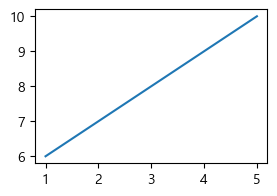

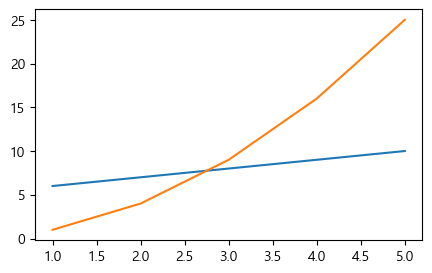

In [120]:
# 시각화
# 도화지 만들기
plt.figure(figsize=(3,2))

x = [1,2,3,4,5]
y = [6,7,8,9,10]

plt.plot(x,y)
plt.show()

plt.figure(figsize=(5,3))

x = [1,2,3,4,5]
y = [6,7,8,9,10]

x1 = x
y1 = [i**2 for i in x]

plt.plot(x,y)
plt.plot(x1, y1)


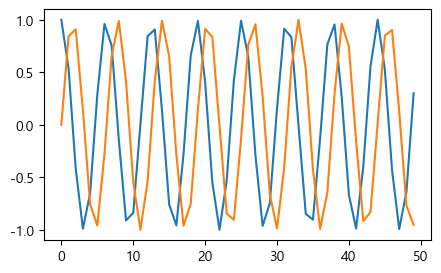

In [121]:
plt.figure(figsize=(5,3))

x = range(50)
y = [np.cos(i) for i in x]

x1 = range(50)
y1 = [np.sin(i) for i in x1]

plt.plot(x,y)
plt.plot(x1, y1)
plt.show()

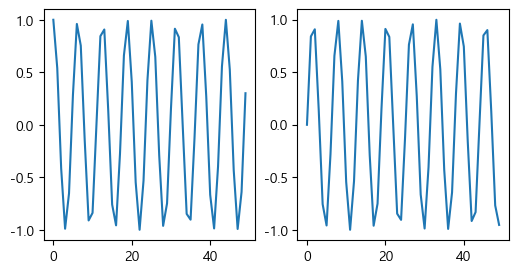

In [122]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.plot(x,y)

plt.subplot(1,2,2)
plt.plot(x1, y1)

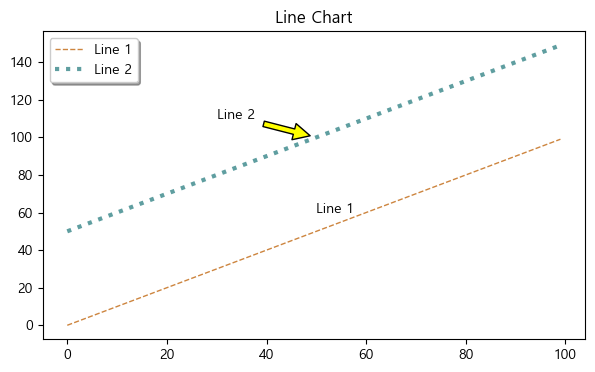

In [131]:
plt.figure(figsize=(7,4))

x1 = range(100)
y1 = [value for value in x1]

x2 = range(100)
y2 = [value+50 for value in x2]

plt.plot(x1, y1, c='peru', ls='dashed', lw=1, label='Line 1')
plt.plot(x2, y2, c='cadetblue', ls='dotted', lw=3, label='Line 2')

plt.text(50,60,'Line 1')
plt.annotate('Line 2', xytext=(30,110), xy=(50,100), arrowprops=dict(facecolor='yellow', shrink=0.1))

plt.legend(fancybox=True, shadow=True, loc='upper left')

plt.title('Line Chart')
plt.savefig('line_plot.jpg')

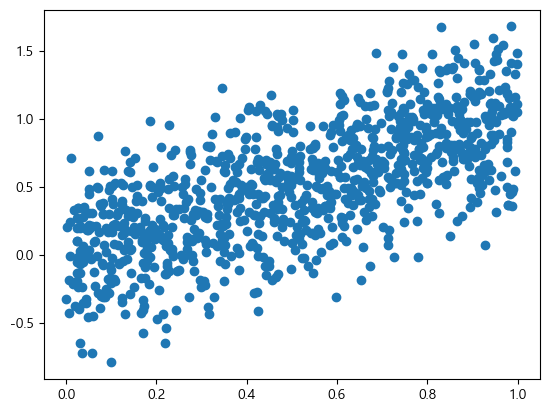

In [136]:
# Scatter Plot : scatter()
x = [1,2,3,4,5]
y = [6,7,8,9,10]

#plt.plot(x,y)
#plt.show()

x = np.random.rand(1000)
y = x + np.random.randn(1000)/3

plt.scatter(x,y)


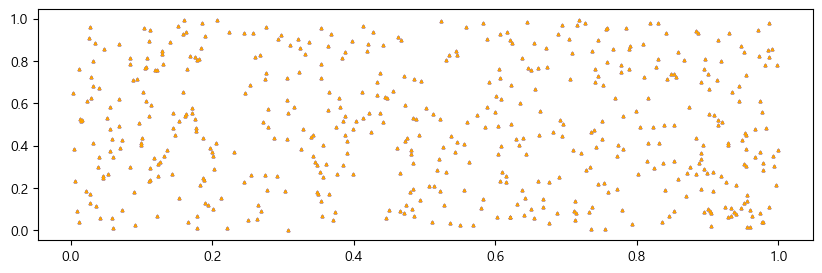

In [140]:
data1 = np.random.rand(512, 2)
data2 = np.random.rand(512, 2)

plt.figure(figsize=(10,3))

x = data1[:, 0]
y = data1[:, 1]

x = data2[:, 0]
y = data2[:, 1]

plt.scatter(x,y, c='b', s=3, marker='^')
plt.scatter(x,y, c='orange', s=3, marker='^')